In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import cv2 

In [2]:
with open('./speed_per_20.npz', 'rb') as f:
    arr = np.load(f)

In [3]:
arr.shape 

(8, 540, 960, 2)

In [4]:
h, w = arr.shape[1:3]
fx, fy = arr[:, :,:,0], arr[:, :,:,1]

ang = np.arctan2(fy, fx) + np.pi
v = np.sqrt(fx*fx+fy*fy)

In [5]:

hsv = np.zeros((ang.shape[0], h, w, 3), np.uint8)

In [6]:
hsv.shape

(8, 540, 960, 3)

In [7]:
hsv[...,0] = ang*(180/np.pi/2)
hsv[...,1] = 255
hsv[...,2] = np.minimum(v*4, 255)
# bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)


In [8]:
hsv.shape

(8, 540, 960, 3)

In [11]:
hsv[..., 0].sum()

227373941

In [12]:
vx = arr[:, :, :, 1]
vy = arr[:, :, :, 0]

In [13]:
v = np.sqrt(vx * vx + vy * vy)

In [14]:
v.shape

(8, 540, 960)

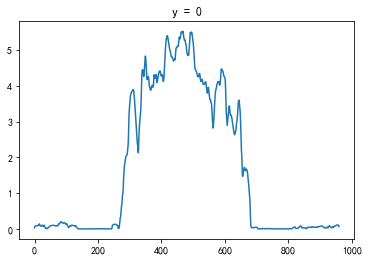

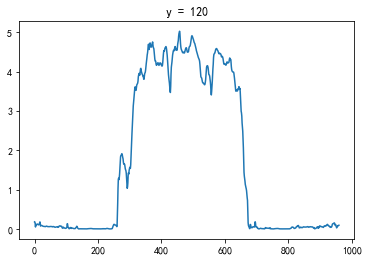

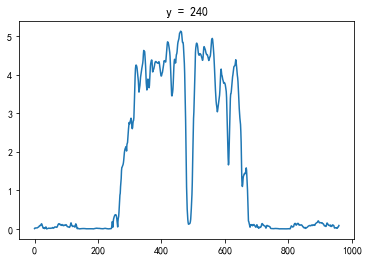

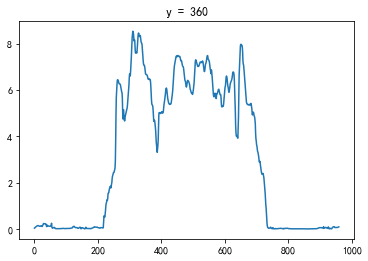

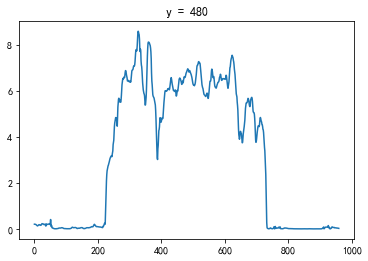

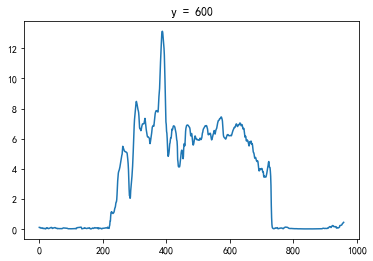

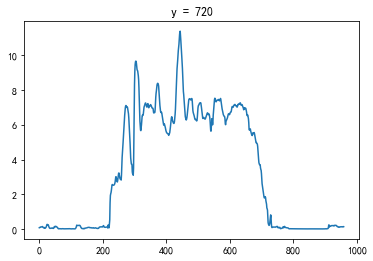

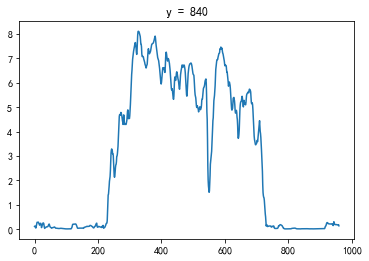

In [15]:

for i in range(ang.shape[0]):
    plt.title(f"y = {i * 120}")
    plt.plot(v[i, 0, :])
    plt.show()

In [16]:
# hsv = np.zeros((ang.shape[0], h, w, 3), np.uint8)

# def calc_hsv(hsv):
#     hsv[...,0] = ang*(180/np.pi/2)
#     hsv[...,1] = 255
#     hsv[...,2] = np.minimum(v*4, 255)
#     return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

In [17]:
ang.shape 

(8, 540, 960)

In [18]:
hsv.shape

(8, 540, 960, 3)

In [19]:
bgr = np.array([cv2.cvtColor(hsv[i], cv2.COLOR_HSV2RGB).tolist() for i in range(8)])

In [20]:
bgr.shape

(8, 540, 960, 3)

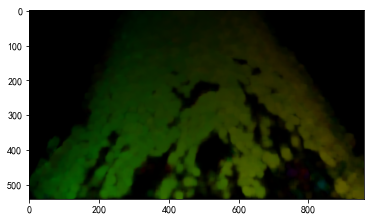

In [21]:
plt.imshow(bgr[0])

In [23]:
bgr[0].shape 

(540, 960, 3)

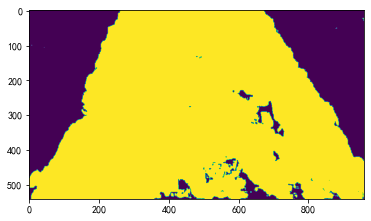

In [41]:
plt.imshow(np.where(bgr[1].sum(axis = 2) == 0, 0, 255 ))

In [42]:
different_map = np.where(bgr[1].sum(axis = 2) == 0, 0, 255 )

In [43]:
start_index = different_map[120, :].tolist().index(255)
end_index = 960 - different_map[120, :].tolist()[::-1].index(255)

In [62]:
real_point = np.array("1.013	2.867	4.263	4.442	4.229	3.516	3.814	2.278".split("\t"), dtype="float")

In [63]:
indices = np.array([*range(0, 421, 60)])
map_indices = (indices * (end_index - start_index) / 420).astype("int")

In [64]:
indices

array([  0,  60, 120, 180, 240, 300, 360, 420])

In [87]:
map_indices

array([  0,  79, 158, 237, 316, 395, 474, 553])

In [65]:
pred = v[1][120, map_indices]

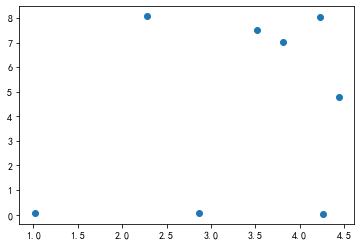

In [67]:
plt.scatter(real_point, pred)

In [68]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression(fit_intercept=True)
lr.fit(real_point.reshape(-1, 1), pred)

LinearRegression()

In [77]:
lr.coef_, lr.intercept_

(array([0.97954718]), 1.215664782965347)

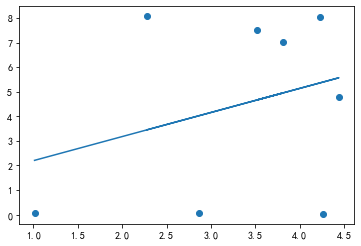

In [78]:
plt.scatter(real_point, pred)
plt.plot(real_point, lr.predict(real_point.reshape(-1, 1)))

In [81]:
from sklearn.metrics import r2_score

In [83]:
r2_score(real_point, real_point + 1)

0.1892747124902111

In [84]:
from scipy.stats import pearsonr

In [86]:
pearsonr(real_point, pred)

(0.3076979298557688, 0.45844735030666733)

In [88]:
different_map.shape

(540, 960)